# ***Data Transformation | Treasure Hunt Dataset***

**Objective**
<br>- To Perform Data Transformation on TresureHunt Dataset
(Label Encoding, One Hot Encoding, Normalization and Scaling)
<br>
<br>***Problem Definition***
<br>- Perform Data Transformation, and other Feature Engineering Methods on the Treasure Hunt Dataset provided in the Previous Lab
<br>- Once the Data Transformation Methods are done, proceed with Pandas Profiling and write your observations and conclusions.
<br>
<br>
<br>**Approach/ Methods**
<br>*Using appropriate and correct Syntax and functions accordingly.
<br>Using read_excel and ReadExcelfile to read the xlsx file and sheet within it.
<br>Using Pandas for converting into Dataframe.
<br>Using Jupyter Display function to display the Dataframe.
<br>Using SKlearn for LabelEncoding and Data Transformation
<br>Using SCipy
<br> Using Pandas Profiling*
<br>
<br>
<br>**Observations**
<br>*Analysis & Insights of Dataset.
<br>Used Different Methods to filter out the data.
<br>Applied Different pandas function to clean the dataset.
<br>Approaches for Data Transformation*
<br>
<br>
<br>**Results**
<br>
<br>*• To be able to Visualize Data
<br>• Better Analysis of Datasets 
<br>• Data Representation
<br>• Less Writing of Code
<br>• Efficiently handles huge data
<br>• Makes the data more customizable & flexible
<br>• Considered as one of the useful library for analyzing data
<br>• Learning Feature Engeneering and Data Transformation*
<br>
<br>**Learning & Reflection**
<br>*Better and Clear Analysis of Datasets.
<br>Learning To Transform Data using SKlearn and Label Encoder*

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from dataprep.datasets import load_dataset
from dataprep.eda import create_report

In [91]:
#Loading the data

# As there is one single sheet within the excel file so we
# need to read sheet separately

# If there are multiple sheet read the sheet multiples time
# Using the code below

# sheet_name = pd.read_excel(treasure_hunt, 'sheet_name')

treasure_hunt = pd.ExcelFile("TreasureHuntDataset.xlsx")

#Reading The sheet within the Excel File
form_response = pd.read_excel(treasure_hunt, 'Form Responses 1')


# **Insights Of TreasureHunt Dataset**

In [92]:
display(form_response.head())

,Timestamp,Name,Class,Register Number,Gender,We made _______ during the event,Final Position,"On a scale of 1 to 5, How much did you like the event?",Did you find the Clues Difficult?,Did you find the First Round (Quiz) Easy?,...,How many team mates did you know before?,How many of you were in the Team?,How many team mates spoke the same language as yours?,Count of Team Mates from 1 BSc EA,Count of Team Mates from 1 BSc DS,Count of Team Mates from 3 BSc EA,Count of Team Mates from 3 BSc DS,Count of Team Mates from 5 BSc EA,Count of Team Mates from 5 BSc DS,Count of Team Mates from MSc
0,2022-09-06 16:25:46.465,Sampatha Kollara,3 BSc EA,21112330,Female,WhatsApp Group,Out after Prelims,5,5,5,...,-,1.0,-,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2022-09-06 16:25:53.006,Rahul Gnanapandithan,3 BSc EA,21112322,Male,"Phone Calls, Text Message, WhatsApp Group, Ver...",Out after Prelims,3,3,3,...,volunteers,1.0,volunteers,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2022-09-06 16:26:53.754,rishi menon,3 BSc EA,-,Male,-,Out after Prelims,5,5,5,...,-,2.0,-,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2022-09-08 18:14:18.589,Sudiksha,3 BSc EA,21112342,Female,Verbal Communication,Out after Prelims,4,2,2,...,2,5.0,5,2.0,0.0,3.0,0.0,0.0,0.0,0.0
4,2022-09-08 18:14:34.625,Rishi Menon,3 BSc EA,21112326,Male,"WhatsApp Group, Verbal Communication",Volunteer,5,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
display(form_response.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 21 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   Timestamp                                                     62 non-null     datetime64[ns]
 1   Name                                                          62 non-null     object        
 2   Class                                                         62 non-null     object        
 3   Register Number                                               62 non-null     object        
 4   Gender                                                        62 non-null     object        
 5   We made _______ during the event                              62 non-null     object        
 6   Final Position                                                62 non-null     object        
 7   On a scale

None

# **Outliers using Visualization**

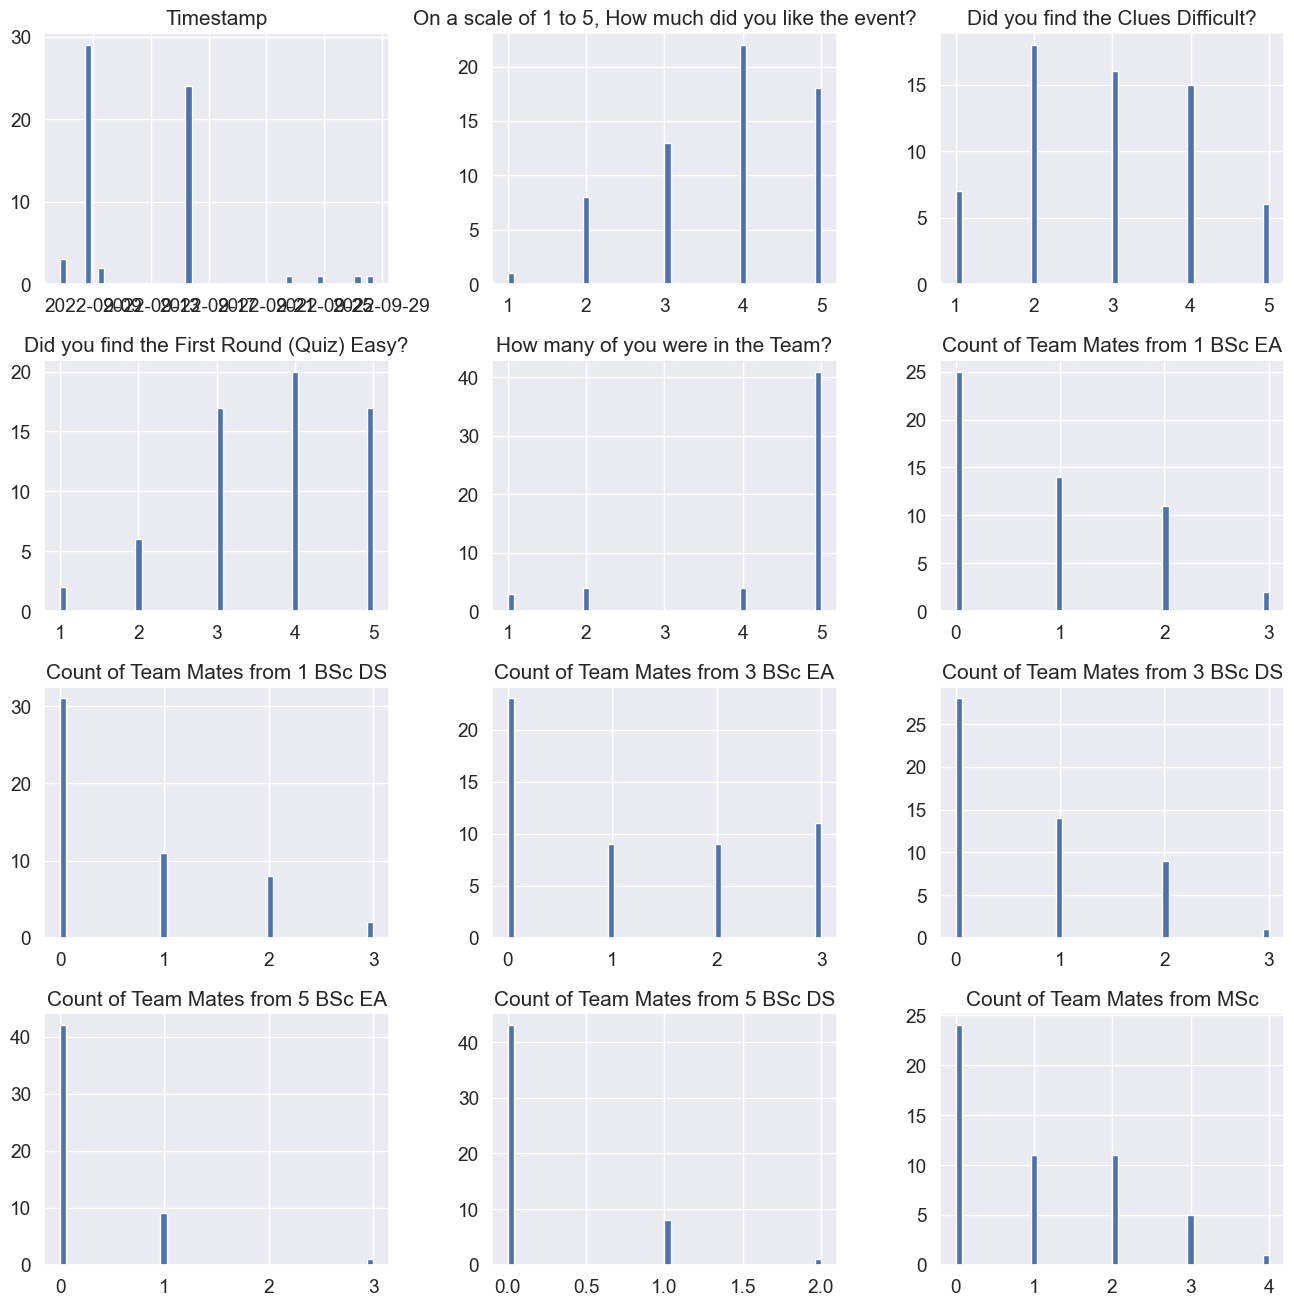

In [94]:
%matplotlib inline
form_response.hist(bins=50, figsize=(16,16))
plt.show()

# **Numerical Outliers**

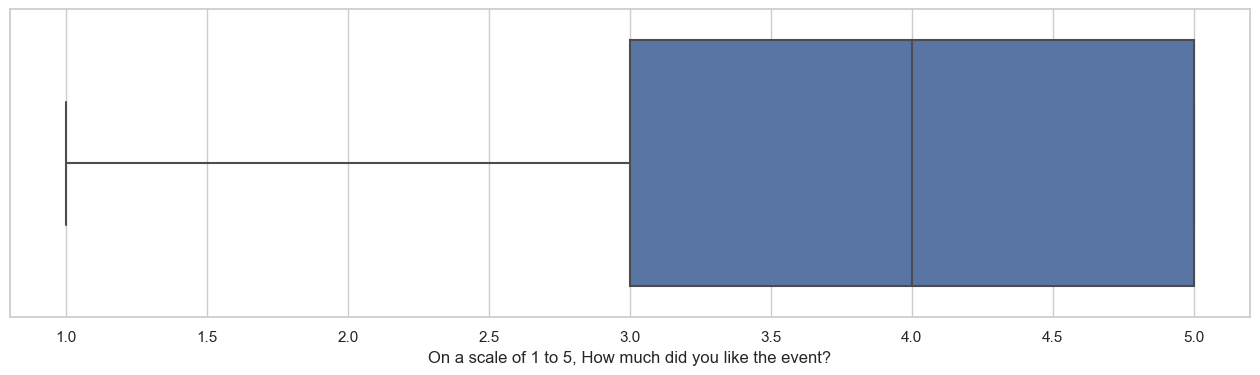

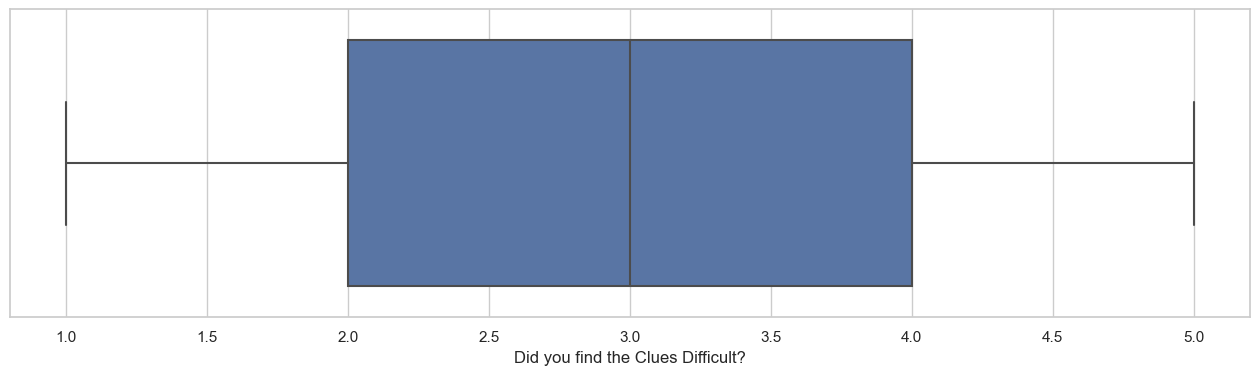

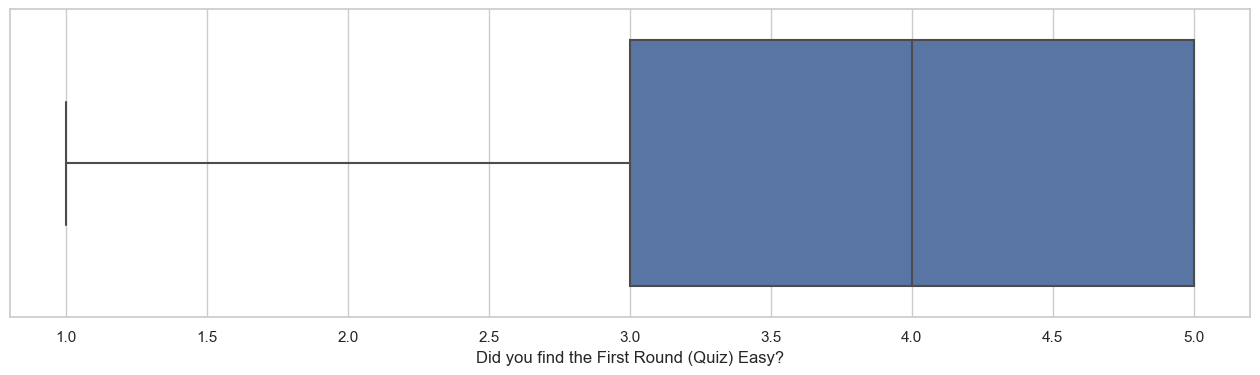

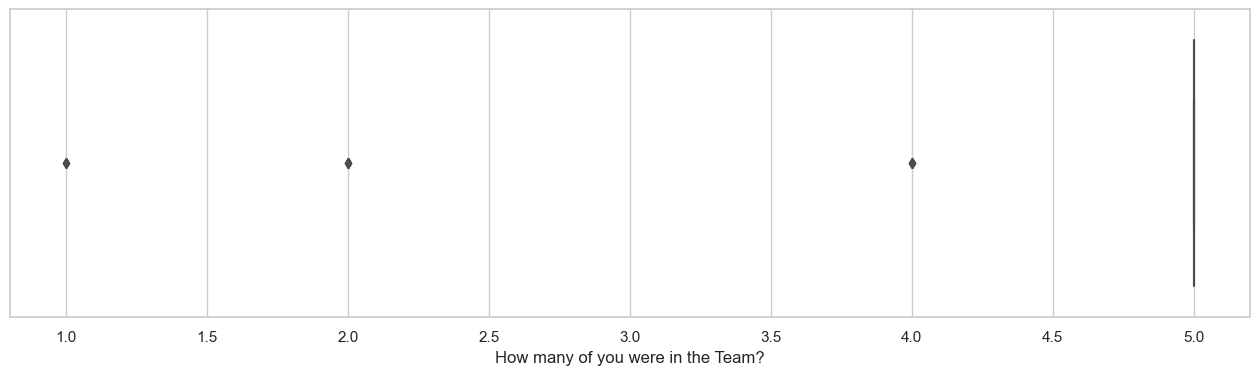

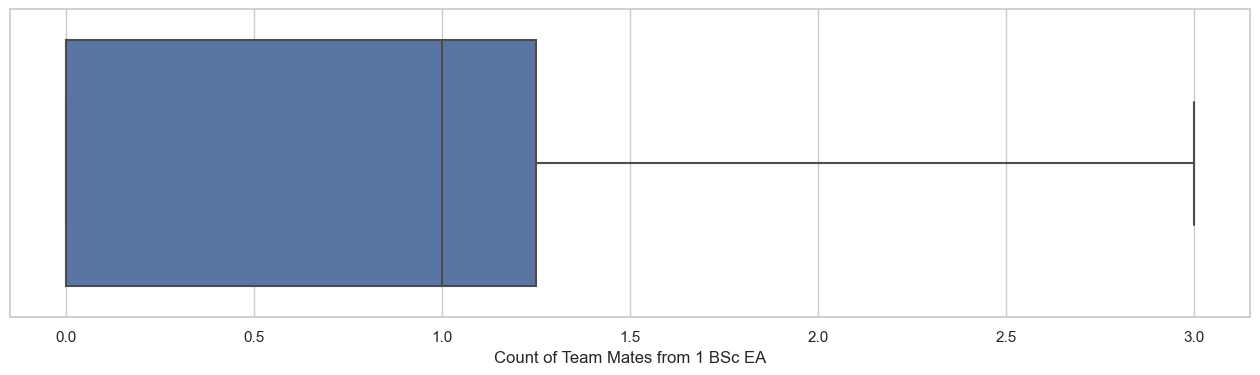

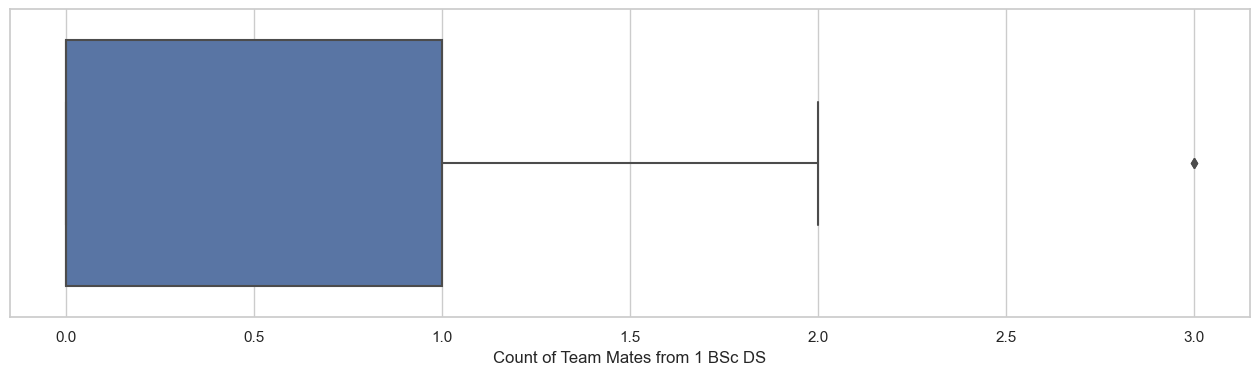

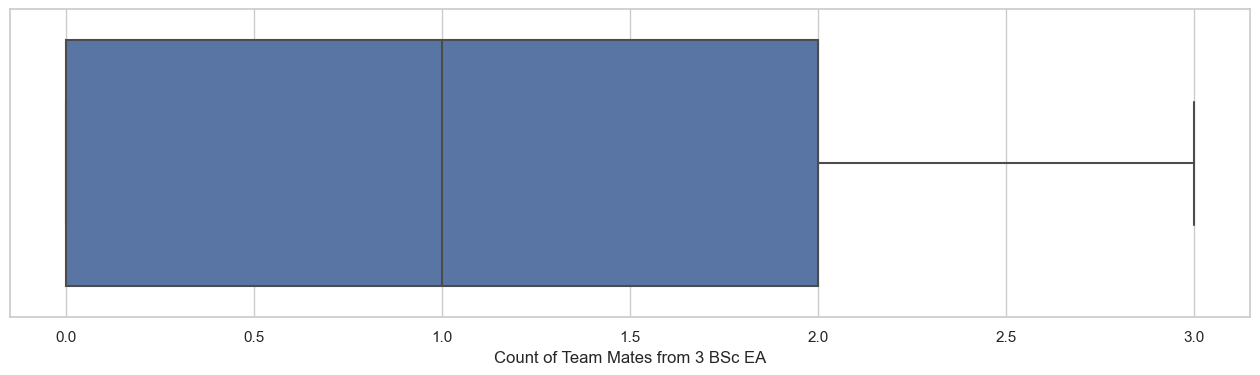

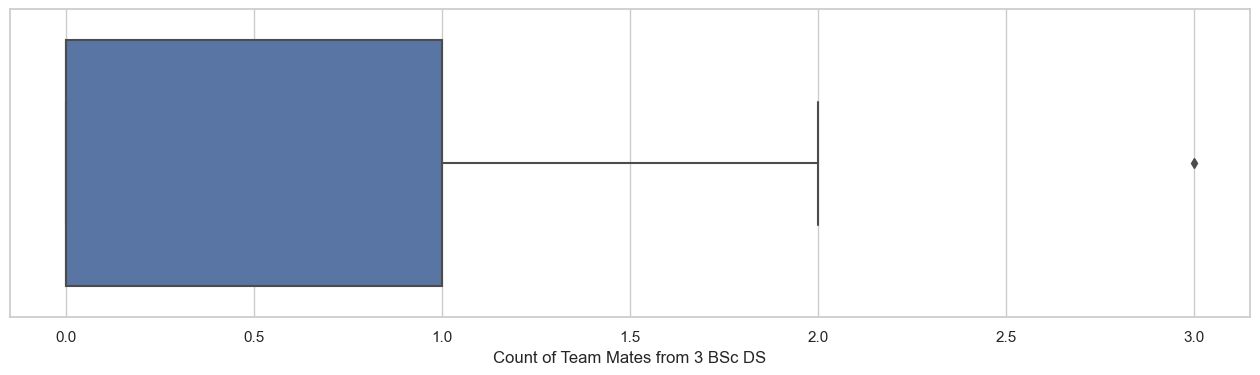

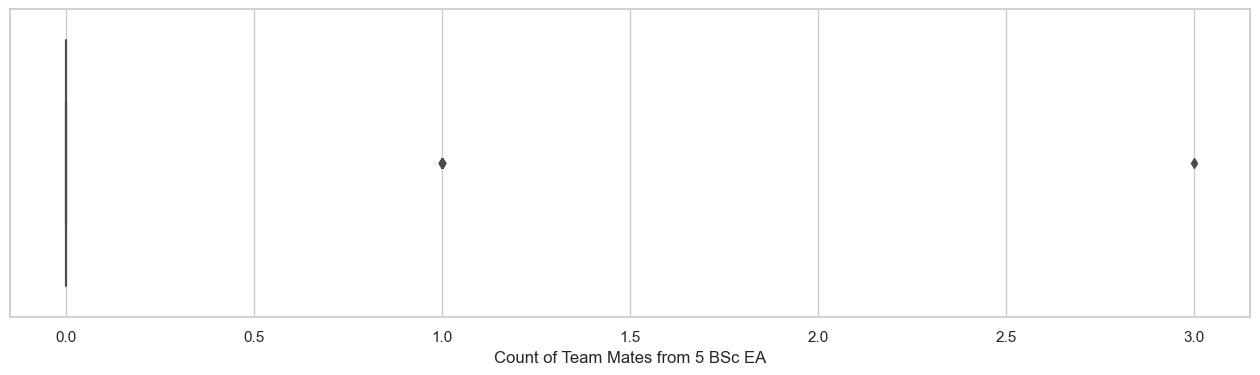

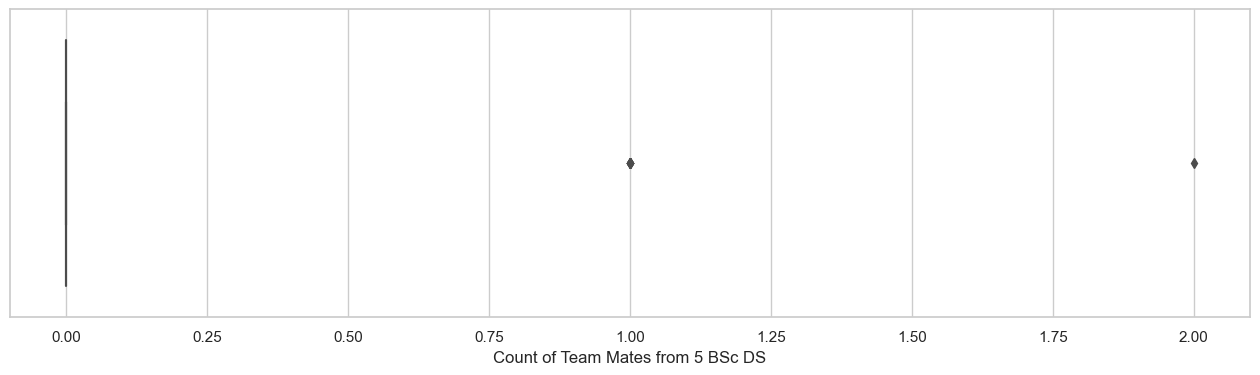

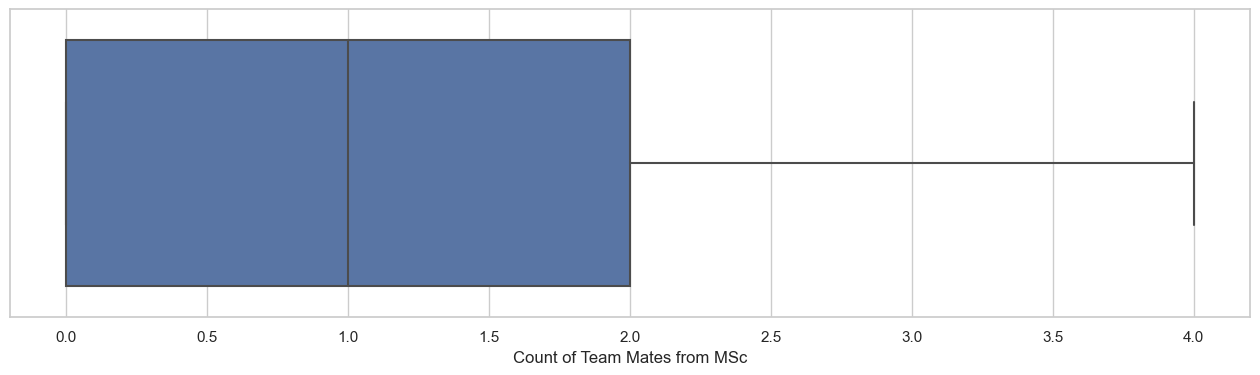

In [95]:
numerical_df = form_response.select_dtypes(exclude=['object'])
numerical_df = numerical_df.drop(["Timestamp"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

In [96]:
display(form_response.get("On a scale of 1 to 5, How much did you like the event?").describe())

count    62.000000
mean      3.774194
std       1.062310
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: On a scale of 1 to 5, How much did you like the event?, dtype: float64

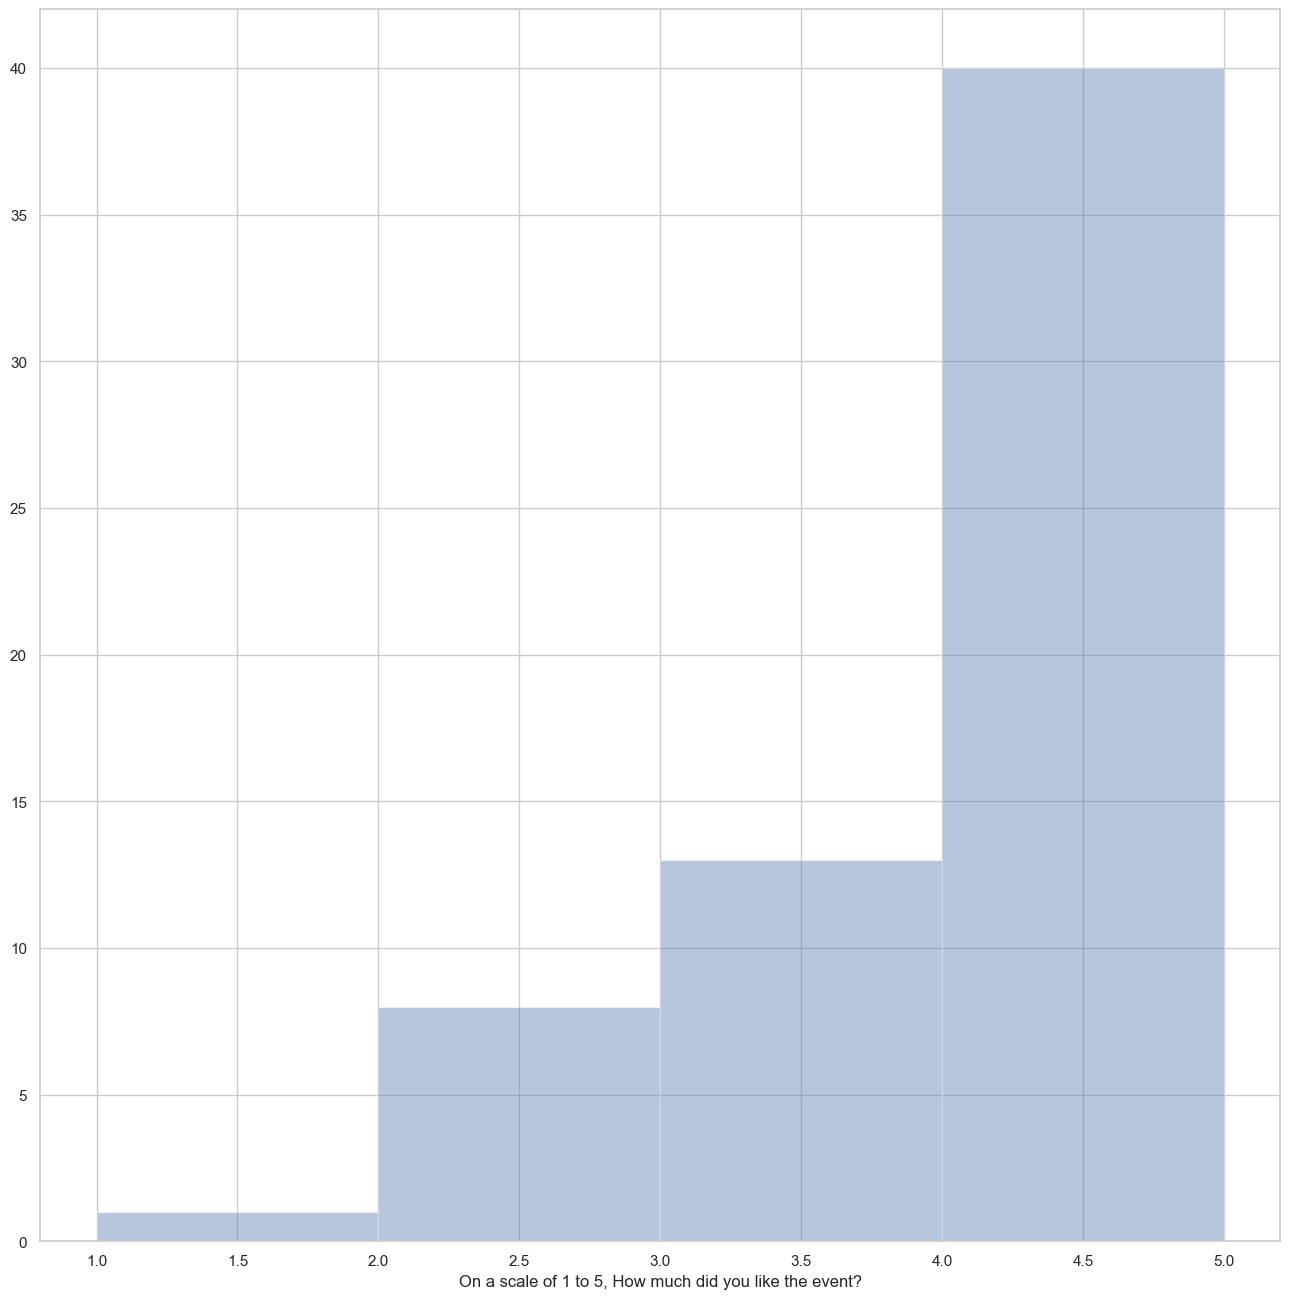

In [97]:
f, ax = plt.subplots(figsize=(16, 16))
sns.distplot(form_response.get("On a scale of 1 to 5, How much did you like the event?"), kde=False)
plt.show()

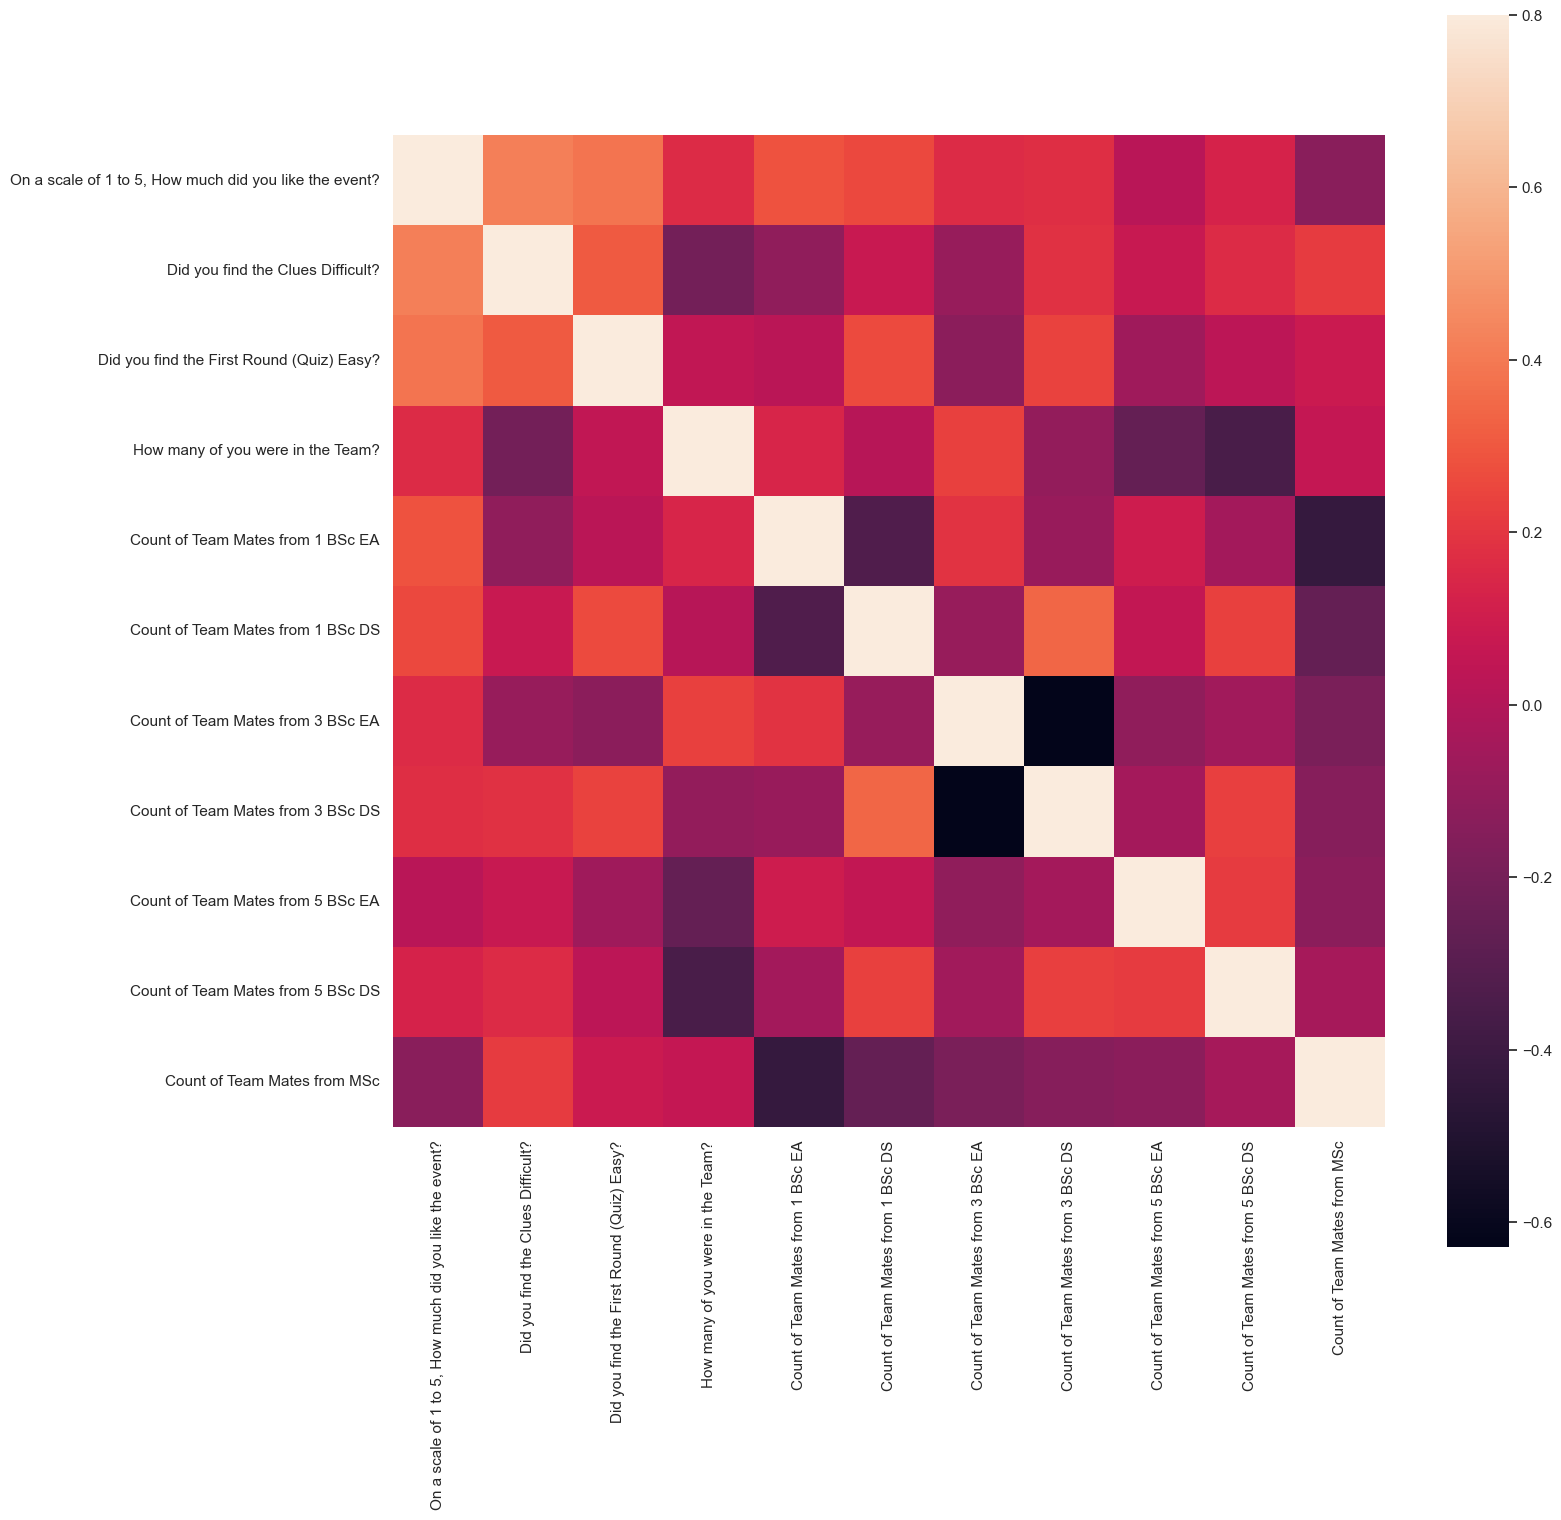

In [98]:
corrmat = form_response.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

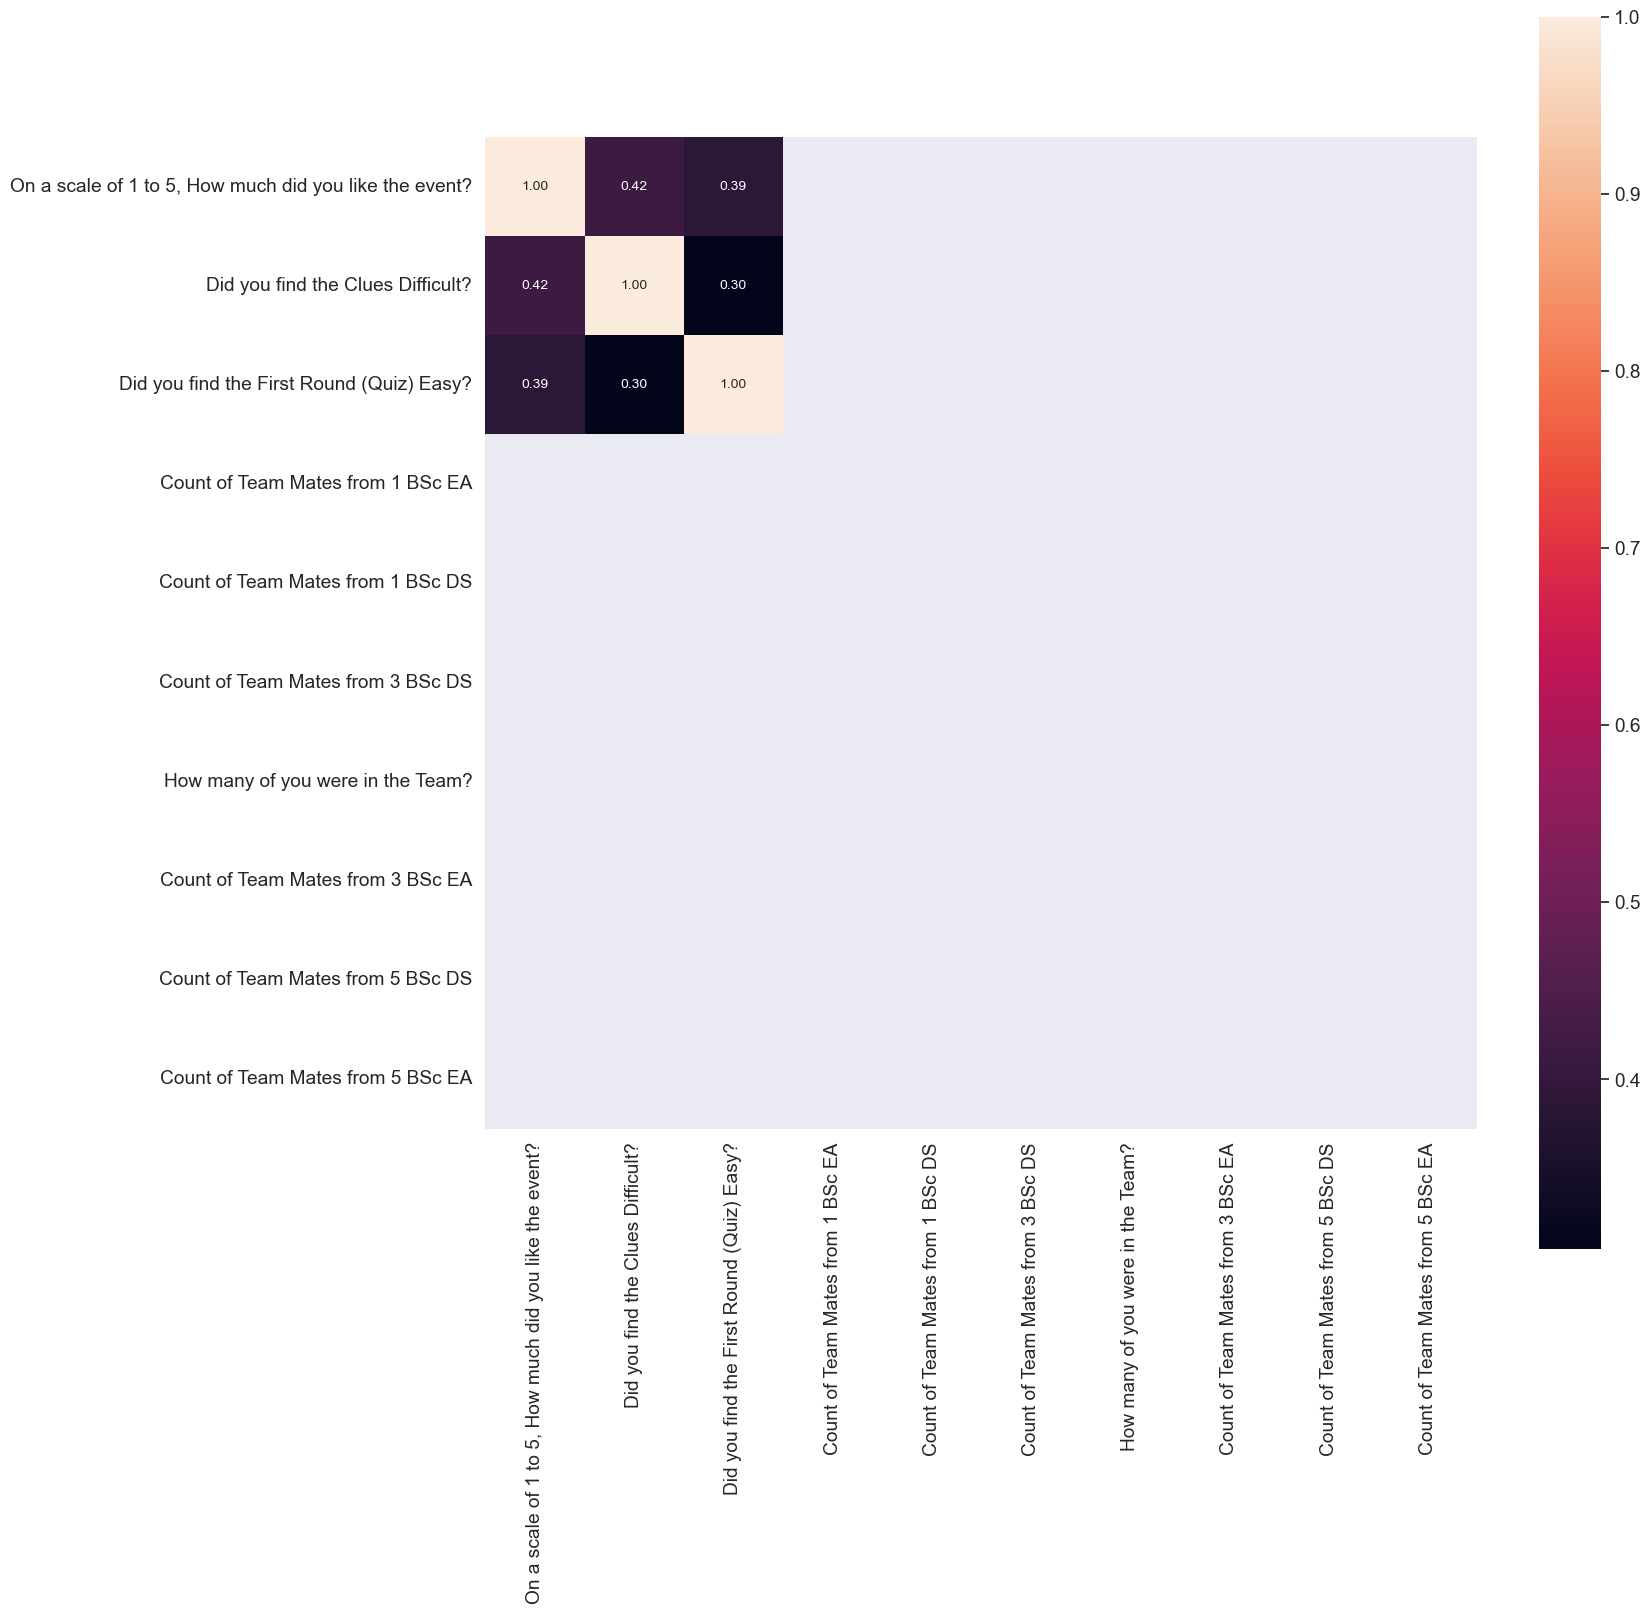

In [99]:
plt.figure(figsize=(16,16))
columns = corrmat.nlargest(10, 'On a scale of 1 to 5, How much did you like the event?')['On a scale of 1 to 5, How much did you like the event?'].index
correlation_matrix = np.corrcoef(form_response[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

# **Dropping Values**

In [100]:
form_response = form_response[form_response["Final Position"].str.contains("Volunteer")==False]
form_response = form_response[form_response["How many team mates did you know before?"].str.contains("volunteers")==False]

In [101]:
#Replacing irrevant values with null values


form_response['How many team mates did you know before?'] = form_response['How many team mates did you know before?'].mask(form_response['How many team mates did you know before?'] == 'None').ffill()
form_response['How many team mates did you know before?'] = form_response['How many team mates did you know before?'].mask(form_response['How many team mates did you know before?'] == 'NONE').ffill()
form_response['How many team mates did you know before?'] = form_response['How many team mates did you know before?'].mask(form_response['How many team mates did you know before?'] == 'none').ffill()
form_response['How many team mates did you know before?'] = form_response['How many team mates did you know before?'].mask(form_response['How many team mates did you know before?'] == 'Zero').ffill()
form_response['How many team mates did you know before?'] = form_response['How many team mates did you know before?'].mask(form_response['How many team mates did you know before?'] == '------Null').ffill()

# **Label Encoding**

In [102]:
display(form_response['Class'].unique())

array(['3 BSc EA', '3 BSc DS'], dtype=object)

In [103]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  


In [104]:
# Encode labels in column 'Class'.
form_response['Class']= label_encoder.fit_transform(form_response['Class'])
  
form_response['Class'].unique()

array([1, 0])

In [105]:
# Encode labels in column 'Gender'.
form_response['Gender']= label_encoder.fit_transform(form_response['Gender'])
  
form_response['Gender'].unique()

array([0, 1])

In [106]:
#This is what Datasets Looks After Applying Label Encoding

# **One Hot Encoding**

In [107]:
form_response2 = pd.read_excel(treasure_hunt, 'Form Responses 1')

display(form_response2['Class'].unique())
display(form_response2['Gender'].unique())
display(form_response2['Final Position'].unique())


array(['3 BSc EA', '3 BSc DS'], dtype=object)

array(['Female', 'Male'], dtype=object)

array(['Out after Prelims', 'Volunteer', 'III Place',
       'Final Round Contestant', 'I Place', 'II Place'], dtype=object)

**Checking for the label counts in the categorical parameters**

In [108]:
display(form_response2['Class'].value_counts())
print("---")
display(form_response2['Gender'].value_counts())
print("---")
display(form_response2['Final Position'].value_counts())


3 BSc EA    38
3 BSc DS    24
Name: Class, dtype: int64

---


Female    31
Male      31
Name: Gender, dtype: int64

---


Out after Prelims         44
Volunteer                 10
III Place                  3
II Place                   3
Final Round Contestant     1
I Place                    1
Name: Final Position, dtype: int64

**One-Hot encoding the categorical parameters using get_dummies()**

In [109]:
one_hot_encoded_data = pd.get_dummies(form_response2, columns = ['Class', 'Gender', 'Final Position'])
display(one_hot_encoded_data)

,Timestamp,Name,Register Number,We made _______ during the event,"On a scale of 1 to 5, How much did you like the event?",Did you find the Clues Difficult?,Did you find the First Round (Quiz) Easy?,Enter your Team Mates Register Numbers (Separated by Commas),How many team mates did you know before?,How many of you were in the Team?,...,Class_3 BSc DS,Class_3 BSc EA,Gender_Female,Gender_Male,Final Position_Final Round Contestant,Final Position_I Place,Final Position_II Place,Final Position_III Place,Final Position_Out after Prelims,Final Position_Volunteer
0,2022-09-06 16:25:46.465,Sampatha Kollara,21112330,WhatsApp Group,5,5,5,-,-,1.0,...,0,1,1,0,0,0,0,0,1,0
1,2022-09-06 16:25:53.006,Rahul Gnanapandithan,21112322,"Phone Calls, Text Message, WhatsApp Group, Ver...",3,3,3,volunteers,volunteers,1.0,...,0,1,0,1,0,0,0,0,1,0
2,2022-09-06 16:26:53.754,rishi menon,-,-,5,5,5,-,-,2.0,...,0,1,0,1,0,0,0,0,1,0
3,2022-09-08 18:14:18.589,Sudiksha,21112342,Verbal Communication,4,2,2,"42,55,59",2,5.0,...,0,1,1,0,0,0,0,0,1,0
4,2022-09-08 18:14:34.625,Rishi Menon,21112326,"WhatsApp Group, Verbal Communication",5,2,3,NaN,NaN,NaN,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2022-09-15 19:23:29.750,Sangeeta P,21112018,"Verbal Communication, Played an online game",4,3,5,2111201821112000042484248779015269122048,2,5.0,...,1,0,1,0,0,0,0,0,1,0
58,2022-09-22 13:59:34.665,Abhishek Tiwari,21112038,WhatsApp Group,3,2,5,I don't know,Zero,4.0,...,1,0,0,1,0,0,1,0,0,0
59,2022-09-24 22:11:29.851,Shubhaansh Kumar Shubh,21112337,"WhatsApp Group, Verbal Communication",5,5,5,-----Null,------Null,1.0,...,0,1,0,1,0,0,0,0,1,0
60,2022-09-27 11:48:11.471,Shreyansh Padarha,21112026,"Phone Calls, WhatsApp Group, Verbal Communication",4,5,3,"21112041,",1,4.0,...,1,0,0,1,0,0,0,0,1,0


**One Hot Encoding using Sci-kit learn Library**

In [110]:
from sklearn.preprocessing import OneHotEncoder
  
#Retrieving data
form_response2 = pd.read_excel(treasure_hunt, 'Form Responses 1')
  
# Converting type of columns to category
form_response2['Class']=form_response2['Class'].astype('category')
form_response2['Gender']=form_response2['Gender'].astype('category')
form_response2['Final Position']=form_response2['Final Position'].astype('category')
  
  
#Assigning numerical values and storing it in another columns
form_response2['Class_new']=form_response2['Class'].cat.codes
form_response2['Gender_new']=form_response2['Gender'].cat.codes 
form_response2['Final Position_new']=form_response2['Final Position'].cat.codes 
  
  
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
  
#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method 
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we 
have huge  number of categorical variables
'''
enc_data=pd.DataFrame(enc.fit_transform(form_response2[['Class_new','Gender_new', 'Final Position_new']]).toarray())
  
#Merge with main
New_df=form_response2.join(enc_data)
  
display(New_df)

,Timestamp,Name,Class,Register Number,Gender,We made _______ during the event,Final Position,"On a scale of 1 to 5, How much did you like the event?",Did you find the Clues Difficult?,Did you find the First Round (Quiz) Easy?,...,0,1,2,3,4,5,6,7,8,9
0,2022-09-06 16:25:46.465,Sampatha Kollara,3 BSc EA,21112330,Female,WhatsApp Group,Out after Prelims,5,5,5,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2022-09-06 16:25:53.006,Rahul Gnanapandithan,3 BSc EA,21112322,Male,"Phone Calls, Text Message, WhatsApp Group, Ver...",Out after Prelims,3,3,3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2022-09-06 16:26:53.754,rishi menon,3 BSc EA,-,Male,-,Out after Prelims,5,5,5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2022-09-08 18:14:18.589,Sudiksha,3 BSc EA,21112342,Female,Verbal Communication,Out after Prelims,4,2,2,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2022-09-08 18:14:34.625,Rishi Menon,3 BSc EA,21112326,Male,"WhatsApp Group, Verbal Communication",Volunteer,5,2,3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2022-09-15 19:23:29.750,Sangeeta P,3 BSc DS,21112018,Female,"Verbal Communication, Played an online game",Out after Prelims,4,3,5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58,2022-09-22 13:59:34.665,Abhishek Tiwari,3 BSc DS,21112038,Male,WhatsApp Group,II Place,3,2,5,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
59,2022-09-24 22:11:29.851,Shubhaansh Kumar Shubh,3 BSc EA,21112337,Male,"WhatsApp Group, Verbal Communication",Out after Prelims,5,5,5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
60,2022-09-27 11:48:11.471,Shreyansh Padarha,3 BSc DS,21112026,Male,"Phone Calls, WhatsApp Group, Verbal Communication",Out after Prelims,4,5,3,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
# Using get_dummies

one_hot_encoded_data = pd.get_dummies(form_response2, columns = ['Class','Gender', 'Final Position'])
display(one_hot_encoded_data)

,Timestamp,Name,Register Number,We made _______ during the event,"On a scale of 1 to 5, How much did you like the event?",Did you find the Clues Difficult?,Did you find the First Round (Quiz) Easy?,Enter your Team Mates Register Numbers (Separated by Commas),How many team mates did you know before?,How many of you were in the Team?,...,Class_3 BSc DS,Class_3 BSc EA,Gender_Female,Gender_Male,Final Position_Final Round Contestant,Final Position_I Place,Final Position_II Place,Final Position_III Place,Final Position_Out after Prelims,Final Position_Volunteer
0,2022-09-06 16:25:46.465,Sampatha Kollara,21112330,WhatsApp Group,5,5,5,-,-,1.0,...,0,1,1,0,0,0,0,0,1,0
1,2022-09-06 16:25:53.006,Rahul Gnanapandithan,21112322,"Phone Calls, Text Message, WhatsApp Group, Ver...",3,3,3,volunteers,volunteers,1.0,...,0,1,0,1,0,0,0,0,1,0
2,2022-09-06 16:26:53.754,rishi menon,-,-,5,5,5,-,-,2.0,...,0,1,0,1,0,0,0,0,1,0
3,2022-09-08 18:14:18.589,Sudiksha,21112342,Verbal Communication,4,2,2,"42,55,59",2,5.0,...,0,1,1,0,0,0,0,0,1,0
4,2022-09-08 18:14:34.625,Rishi Menon,21112326,"WhatsApp Group, Verbal Communication",5,2,3,NaN,NaN,NaN,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2022-09-15 19:23:29.750,Sangeeta P,21112018,"Verbal Communication, Played an online game",4,3,5,2111201821112000042484248779015269122048,2,5.0,...,1,0,1,0,0,0,0,0,1,0
58,2022-09-22 13:59:34.665,Abhishek Tiwari,21112038,WhatsApp Group,3,2,5,I don't know,Zero,4.0,...,1,0,0,1,0,0,1,0,0,0
59,2022-09-24 22:11:29.851,Shubhaansh Kumar Shubh,21112337,"WhatsApp Group, Verbal Communication",5,5,5,-----Null,------Null,1.0,...,0,1,0,1,0,0,0,0,1,0
60,2022-09-27 11:48:11.471,Shreyansh Padarha,21112026,"Phone Calls, WhatsApp Group, Verbal Communication",4,5,3,"21112041,",1,4.0,...,1,0,0,1,0,0,0,0,1,0


# **Data Normalization**

In [112]:
form_response2 = pd.read_excel(treasure_hunt, 'Form Responses 1')

In [113]:
df_max_scaled = form_response2[['On a scale of 1 to 5, How much did you like the event?', 'Did you find the Clues Difficult?', 'Did you find the First Round (Quiz) Easy?']].copy()
display(df_max_scaled)

,"On a scale of 1 to 5, How much did you like the event?",Did you find the Clues Difficult?,Did you find the First Round (Quiz) Easy?
0,5,5,5
1,3,3,3
2,5,5,5
3,4,2,2
4,5,2,3
...,...,...,...
57,4,3,5
58,3,2,5
59,5,5,5
60,4,5,3


In [114]:
## Applied Max Scaling Normalization


for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,"On a scale of 1 to 5, How much did you like the event?",Did you find the Clues Difficult?,Did you find the First Round (Quiz) Easy?
0,1.0,1.0,1.0
1,0.6,0.6,0.6
2,1.0,1.0,1.0
3,0.8,0.4,0.4
4,1.0,0.4,0.6
...,...,...,...
57,0.8,0.6,1.0
58,0.6,0.4,1.0
59,1.0,1.0,1.0
60,0.8,1.0,0.6


# **Using Libraries For EDA**

In [117]:
#Could not use Automated EDA libraries as it was giving errors